# Predicting Images CIFAR-10
## Data
The label data is just a list of 10,000 numbers ranging from 0 to 9, which corresponds to each of the 10 classes in CIFAR-10.

- airplane : 0
- automobile : 1
- bird : 2
- cat : 3
- deer : 4
- dog : 5
- frog : 6
- horse : 7
- ship : 8
- truck : 9

## Preparing Tools and Loading Data

In [0]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [7]:
 X_train[0].shape

(32, 32, 3)

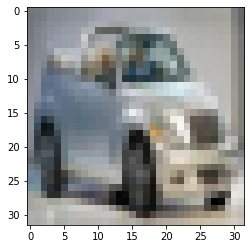

In [8]:
plt.imshow(X_train[61]);

## Normalizing

In [9]:
X_train.min(), X_train.max()

(0, 255)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [0]:
from tensorflow.keras.utils import to_categorical

y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [13]:
len(y_cat_test[0]), y_cat_test[:5]

(10, array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))

## Modelling

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [0]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32,
                 kernel_size=(4,4),
                 strides=(1,1),
                 padding='valid',
                 input_shape=(32, 32, 3),
                 activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional Layer
model.add(Conv2D(filters=32,
                 kernel_size=(4,4),
                 strides=(1,1),
                 padding='valid',
                 input_shape=(32, 32, 3),
                 activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',
                           patience=2)

In [28]:
model.fit(X_train,
          y_cat_train,
          epochs=15,
          validation_data=(X_test, y_cat_test),
          callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4999 - accuracy: 0.4564 - val_loss: 1.3428 - val_accuracy: 0.5256
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1643 - accuracy: 0.5912 - val_loss: 1.1778 - val_accuracy: 0.5906
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0179 - accuracy: 0.6434 - val_loss: 1.0226 - val_accuracy: 0.6419
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9062 - accuracy: 0.6830 - val_loss: 0.9781 - val_accuracy: 0.6638
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8143 - accuracy: 0.7145 - val_loss: 0.9580 - val_accuracy: 0.6740
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7351 - accuracy: 0.7420 - val_loss: 0.9703 - val_accuracy: 0.6759
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6565 - accuracy: 0.7690 - val_loss: 0.9810 - val_accuracy:

## Evaluation

In [29]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.499872,0.45638,1.342793,0.5256
1,1.164330,0.59124,1.177802,0.5906
2,1.017922,0.64338,1.022626,0.6419
3,0.906209,0.68302,0.978050,0.6638
4,0.814300,0.71446,0.957989,0.6740
5,0.735128,0.74200,0.970307,0.6759
6,0.656500,0.76900,0.981020,0.6803


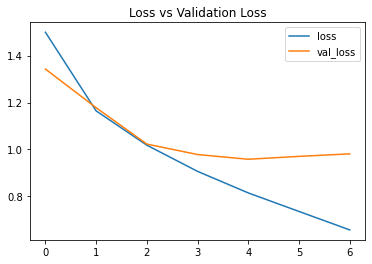

In [33]:
metrics[['loss', 'val_loss']].plot();
plt.title('Loss vs Validation Loss');

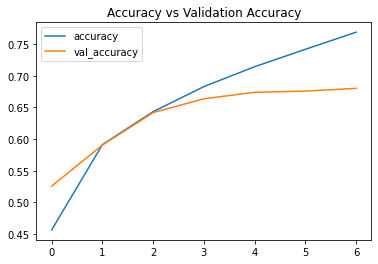

In [34]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy vs Validation Accuracy');

In [36]:
model.evaluate(X_test, y_cat_test)
# loss accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.9810 - accuracy: 0.6803


[0.9810196161270142, 0.6802999973297119]

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1000
           1       0.89      0.71      0.79      1000
           2       0.59      0.58      0.59      1000
           3       0.51      0.48      0.50      1000
           4       0.62      0.65      0.64      1000
           5       0.53      0.62      0.58      1000
           6       0.78      0.71      0.75      1000
           7       0.80      0.69      0.74      1000
           8       0.72      0.83      0.77      1000
           9       0.73      0.79      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [39]:
print(confusion_matrix(y_test, predictions))

[[730  11  69  18  19   8   9   6 104  26]
 [ 45 709  12  14   3   7  11   4  63 132]
 [ 66   5 585  58  87  82  58  20  16  23]
 [ 25   8  65 479  74 233  40  26  21  29]
 [ 24   4  69  59 653  65  39  56  24   7]
 [ 17   2  52 166  58 625  16  37  13  14]
 [  9   3  72  73  55  43 715   5  11  14]
 [ 21   3  31  40  83  89   8 689   9  27]
 [ 70  14  24  13   8   8   4   4 827  28]
 [ 39  42  17  13  12   9  12  10  55 791]]


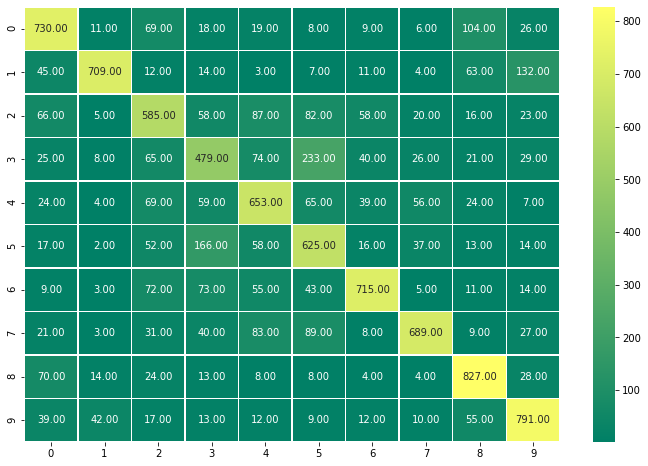

In [42]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, predictions),
            annot=True,
            fmt='0.2f',
            cmap='summer',
            linewidths=0.5);

## Predicting on New Image

In [0]:
my_image = X_test[2]

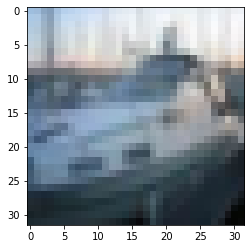

In [45]:
plt.imshow(my_image)

In [46]:
y_test[2]

array([8], dtype=uint8)

In [47]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([8])